#Awesome! It worked!
###Now to try it on the real observed data!
Recall that the original function I plotted was:
```
def Cp(t, Cp_tload=10.0, Cp_target=600.0):  
    """Cp(t), empirically defined to approximate Fig. 3 in Black et al 2003 (t in min, Cp in ng/ml).

    Keyword arguments:
    Cp_tload  -- end of loading dose, in minutes
    Cp_target -- the target steady-state Cp(infinity)  (can be 0 if no maintenance infusion)
    Compare Fig. 3 in Black et al 2003 and effect_compartment_modeling_20141025.xlsx
    """

    import math  # for exp(x)

    # define constants
    Cp_bigA = 3100
    Cp_a = 0.66
    Cp_t1 = 1.0
    Cp_t2 = 10.0 
    Cp_peak = 2.0*Cp_bigA/(1+math.exp(-Cp_a*Cp_tload)) - Cp_bigA  
        # = Cp(Cp_tload) -- possibly inelegant, but whatever -- doesn't use an optimized compiler, after all

    if t <= Cp_tload:
        return 2.0*Cp_bigA/(1+math.exp(-Cp_a*t)) - Cp_bigA
    else:
        return Cp_target + (Cp_peak - Cp_target)*(2.0**((Cp_tload-t)/Cp_t1)+2.0**((Cp_tload-t)/Cp_t2))/2.0
In other words, y(t)=A1/(1+exp{-k1t})
```

0.46209812037329684
[    0.           778.80119348  1465.1312173   2005.77605069  2395.23325454
  2658.07231902  2827.74346763  2934.14838241  2999.67134737  3039.56742008]


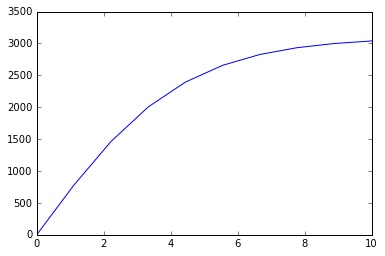

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
testxs = np.linspace(0,10,10)
ln2 = math.log(2)
A1 = 3100.0
k1 = ln2/1.5
print(k1)
testys = A1*(2/(1+np.exp(-k1*testxs))-1)
print(testys)
plt.plot(testxs, testys)

### Original data:
<img src=method3_plot.png>
Plus add a point at (0.0, baseline) 
* 56+2.0/3 = mean baseline [LD] from 10 PD, 1 ctrl and 1 TS subject (the ctrl value was 0)
* 55.4     = mean baseline [LD] from 10 PD

In [2]:
import csv
with open('Cp_estimation_20150304.csv', 'rb') as datafile:
    data  = np.genfromtxt(datafile, delimiter=",", usecols=range(0,7), names=True)  # imports as floats
#    data = np.recfromcsv(datafile, names=True) # imports as ints
print(data.shape)
print(data.size, data['LD'].size)
data

(169,)
169 169


array([(0.0, 0.0, 109.0, 76.0, 1.0, 1.0, 1.0),
       (0.002777778, 4.0, 572.0, 76.0, 1.0, 0.0, 0.0),
       (0.005555556, 8.0, 2165.0, 76.0, 1.0, 0.0, 0.0),
       (0.010416667, 15.0, 1329.0, 76.0, 1.0, 0.0, 0.0),
       (0.017361111, 25.0, 855.0, 76.0, 1.0, 0.0, 0.0),
       (0.027777778, 40.0, 577.0, 76.0, 1.0, 0.0, 0.0),
       (0.070833333, 102.0, 468.0, 76.0, 1.0, 0.0, 0.0),
       (0.002777778, 4.0, 2408.0, 82.0, 1.0, 1.0, 1.0),
       (0.004861111, 7.0, 3130.0, 82.0, 1.0, 0.0, 0.0),
       (0.007638889, 11.0, 2911.0, 82.0, 1.0, 0.0, 0.0),
       (0.010416667, 15.0, 1913.0, 82.0, 1.0, 0.0, 0.0),
       (0.017361111, 25.0, 1490.0, 82.0, 1.0, 0.0, 0.0),
       (0.027777778, 40.0, 960.0, 82.0, 1.0, 0.0, 0.0),
       (0.061805556, 89.0, 528.0, 82.0, 1.0, 0.0, 0.0),
       (0.0, 0.0, 64.0, 89.0, 1.0, 1.0, 1.0),
       (0.002777778, 4.0, 615.0, 89.0, 1.0, 0.0, 0.0),
       (0.005555556, 8.0, 1185.0, 89.0, 1.0, 0.0, 0.0),
       (0.010416667, 15.0, 1112.0, 89.0, 1.0, 0.0, 0.0),
       

How many cells have data from time zero?

In [3]:
np.count_nonzero(data['new_minutes']==0.0)
# see http://stackoverflow.com/questions/8364674/python-numpy-how-to-count-the-number-of-true-elements-in-a-bool-array

14

In [4]:
print(data.shape)
count=0
for row in data:
    if count<7:
        print(row)
    count+=1
#data2=np.asarray(for row in data: np.asarray[row])
#data2[0:5]

(169,)
(0.0, 0.0, 109.0, 76.0, 1.0, 1.0, 1.0)
(0.002777778, 4.0, 572.0, 76.0, 1.0, 0.0, 0.0)
(0.005555556, 8.0, 2165.0, 76.0, 1.0, 0.0, 0.0)
(0.010416667, 15.0, 1329.0, 76.0, 1.0, 0.0, 0.0)
(0.017361111, 25.0, 855.0, 76.0, 1.0, 0.0, 0.0)
(0.027777778, 40.0, 577.0, 76.0, 1.0, 0.0, 0.0)
(0.070833333, 102.0, 468.0, 76.0, 1.0, 0.0, 0.0)


In [5]:
datainf=data[data['new_minutes'].nonzero()]
print('{} elements in datainf, of which {} are nonzero'.format(datainf.size, np.count_nonzero(datainf)))
print(datainf[0])

155 elements in datainf, of which 155 are nonzero
(0.002777778, 4.0, 572.0, 76.0, 1.0, 0.0, 0.0)


In [6]:
times=datainf['new_minutes']
concs=datainf['LD']
times=np.append(times,0.0)
concs=np.append(concs,0.0) ## OOPS -- this should have been ...(concs,55.4)  /kjb 07 Mar 2015
print('{} elements in times and {} in concs'.format(times.size,concs.size))
print(times[0], concs[0])
print(times[-1], concs[-1])

156 elements in times and 156 in concs
4.0 572.0
0.0 0.0


This next part all went wrong:
```
myvalues=np.asarray([(0.0,0.0,55.4,999.0,1.0,0.0,0.0)])
mytuple=np.asarray((0.0,0.0,55.4,999.0,1.0,0.0,0.0))
print('shapes: datainf {}, myvalues {}, mytuple{}'.format(datainf.shape,myvalues.shape,mytuple.shape))
myvalues=np.ravel(myvalues)
print('After ravel:\nshapes: datainf {}, myvalues {}'.format(datainf.shape,myvalues.shape))
mytest=np.insert(datainf,0,myvalues)
print(datainf.size, np.count_nonzero(datainf['LD']))
print(mytest.size, np.count_nonzero(mytest['LD']))
mytest[0:12]
```

3091.57717631


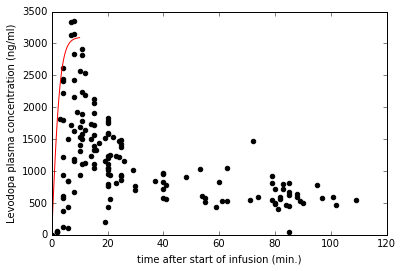

In [7]:
plt.scatter(times,concs,color='black')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# plt.legend(['smoothed','data'], loc='upper left')  # no idea why 'smoothed' is listed first . . .
# plt.savefig('TS_publications.png', dpi=600, transparent=True) 

testxs = np.linspace(0,10,10*5)
ln2 = math.log(2)
A1 = 3100.0
k1 = ln2/1.5
k1=0.66
testys = A1*(2/(1+np.exp(-k1*testxs))-1)
peak   = A1*(2/(1+np.exp(-k1*10.0))-1)
print( peak )
plt.plot(testxs, testys,color='red',marker=None)

plt.show()

In [8]:
def Cp(t, Cp_tload=10.0, Cp_target=600.0, Cp_a=0.66, Bpeak=980.324512, alpha=2.1977, beta=0.043867):  
    """Cp(t), empirically defined to approximate Fig. 3 in Black et al 2003 (t in min, Cp in ng/ml).

    Keyword arguments:
    Cp_tload  -- end of loading dose, in minutes
    Cp_target -- the target steady-state Cp(infinity)  (can be 0 if no maintenance infusion)
    Compare Fig. 3 in Black et al 2003 and effect_compartment_modeling_20141025.xlsx
    """
    import math  # for exp(x)

    # define constants for t<Cp_tload
    Cp_bigA = 3100
    # define constants for t>Cp_tload
    Cp_peak = Cp_bigA*(2/(1+math.exp(-Cp_a*Cp_tload))-1)
        # = Cp(Cp_tload) -- possibly inelegant, but whatever
#    Bpeak=9.80324512e+02  # = 980.324512 -- from fitting (see hysteresis_plotting_new, 04 Mar 2015)
    Apeak=Cp_peak-Bpeak
    Amod=Apeak-Cp_target*Apeak/Cp_peak
    Bmod=Bpeak-Cp_target*Bpeak/Cp_peak
#    alpha=2.19773128
#    beta=4.38673254e-02  # = 0.0438673254 -- from fitting
    
    if t < Cp_tload:
        return Cp_bigA*(2/(1+math.exp(-Cp_a*t))-1)
    else:
        return Cp_target+Amod*math.exp(-alpha*(t-Cp_tload))+Bmod*math.exp(-beta*(t-Cp_tload))

Cp(100 min.) = 637


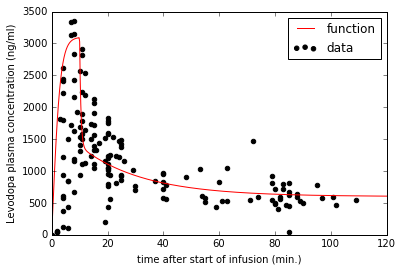

In [9]:
plt.scatter(times,concs,color='black')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# plt.savefig('TS_publications.png', dpi=600, transparent=True) 

# filetimes=( 10.,   20.,   40.,   70.)
# fileconcs=( 3100.,  1100.,   850.,   600.)
# plt.scatter(filetimes,fileconcs,color='green',marker="^",linewidths=8.0) 

testxs = np.linspace(0,120,120*5)
testys = []
for x in testxs: 
    testys.append(Cp(x))

plt.plot(testxs, testys,color='red',marker=None)
plt.legend(['function','data'], loc='upper right')  # no idea why this order

print('Cp(100 min.) = {:.0f}'.format(Cp(80)))
plt.show()

#Now I'm ready to try to fit this curve.
... or see if it's amenable to Laplace transforms.

Or something.

First, those fits above make me think the curve description for the first 10 minutes is off.

Cp(80 min.) = 637


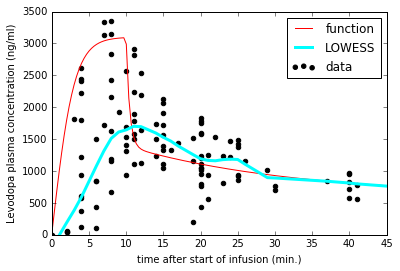

In [10]:
# First plot the real observed data.
plt.scatter(times,concs,color='black')
#plt.axis((0,120,0,3500))
plt.axis((0,45,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')

# Now plot the current model in red.
testxs = np.linspace(0,120,120*3)
testys = []
for x in testxs: 
    testys.append(Cp(x))
plt.plot(testxs, testys,color='red',marker=None)

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
waviness=5
z = lowess(concs,times,frac=1./waviness)
plt.plot(z[:,0],z[:,1],'cyan',linewidth=3)

plt.legend(['function','LOWESS','data'], loc='upper right')  # no idea why this order

print('Cp({} min.) = {:.0f}'.format(80,Cp(80)))
plt.show()

In [14]:
earlytimes=np.select([times<28],[times],default=np.nan)
earlyconcs=np.select([times<28],[concs],default=np.nan)

indices=(times<28.0)
indices # array of Boolean
earlytimes=times[indices]
print(times.size, earlytimes.size)
earlyconcs=concs[indices]
earlysmooth=z[:,1][indices]
print(z.shape, earlysmooth.shape)

156 99


C:\Users\kevin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 156


IndexError: index 155 is out of bounds for axis 1 with size 149

Cp(80 min.) = 637


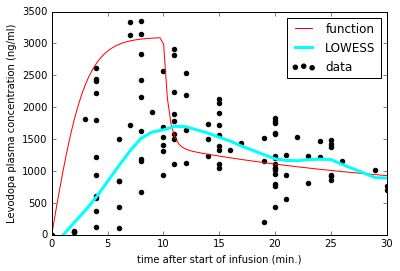

In [15]:
# First plot the real observed data.
plt.scatter(times,concs,color='black')
plt.axis((0,30,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')

# Now plot the current model in red.
plt.plot(testxs, testys,color='red',marker=None)

plt.plot(z[:,0],z[:,1],'cyan',linewidth=3)

plt.legend(['function','LOWESS','data'], loc='upper right')  # no idea why this order

print('Cp({} min.) = {:.0f}'.format(80,Cp(80)))
plt.show()

In [16]:
test=np.logical_and(times>9.5,times <12.5)
test

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,

In [17]:
peaktimes=times[test]
print times.size,peaktimes.size
peaktimes

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-17-8bb87a5b82a9>, line 2)

In [43]:
fives    = np.mean(concs[np.logical_and(times>2.5,times <6.5)])
eights   = np.mean(concs[np.logical_and(times>6.5,times <=10.0)])
elevens  = np.mean(concs[np.logical_and(times>10.0,times <=12.5)])
fifteens = np.mean(concs[np.logical_and(times>12.5,times <=17.5)])
twenties = np.mean(concs[np.logical_and(times>17.5,times <=22.5)])
twen5s   = np.mean(concs[np.logical_and(times>22.5,times <=27.5)])
thirties = np.mean(concs[np.logical_and(times>27.5,times <=35)])
forties  = np.mean(concs[np.logical_and(times>35,times <=45)])
eighties = np.mean(concs[np.logical_and(times>70,times <=90)])

In [44]:
five_time   =np.mean(times[np.logical_and(times>2.5,times <6.5)])
eight_time  =np.mean(times[np.logical_and(times>6.5,times <10.0)])
eleven_time =np.mean(times[np.logical_and(times>10.0,times <12.5)])
fifteen_time=np.mean(times[np.logical_and(times>12.5,times <17.5)])
twenty_time = np.mean(times[np.logical_and(times>17.5,times <=22.5)])
twen5_time   = np.mean(times[np.logical_and(times>22.5,times <=27.5)])
thirty_time = np.mean(times[np.logical_and(times>27.5,times <=35)])
forty_time  = np.mean(times[np.logical_and(times>35,times <=45)])
eighty_time = np.mean(times[np.logical_and(times>70,times <=90)])
print('{:.1f},{:.1f},{:.1f},{:.1f}'.format(five_time,eight_time,eleven_time,fifteen_time))

4.5,7.8,11.3,15.0


In [45]:
five_SD   = np.std(concs[np.logical_and(times>2.5,times <6.5)])
eight_SD  = np.std(concs[np.logical_and(times>6.5,times <10.0)])
eleven_SD = np.std(concs[np.logical_and(times>10.0,times <12.5)])
fifteen_SD= np.std(concs[np.logical_and(times>12.5,times <17.5)])
twenty_SD = np.std(concs[np.logical_and(times>17.5,times <=22.5)])
twen5_SD  = np.std(concs[np.logical_and(times>22.5,times <=27.5)])
thirty_SD = np.std(concs[np.logical_and(times>27.5,times <=35)])
forty_SD  = np.std(concs[np.logical_and(times>35,times <=45)])
eighty_SD = np.std(concs[np.logical_and(times>70,times <=90)])

time:      4.5,    7.8,   11.3,   15.0,   20.1,   24.5,   29.7,   39.9,   82.0
[LD]:   1226.7, 2005.4, 1945.3, 1538.4, 1150.9, 1171.4,  828.7,  779.6,  624.2
S.D.:    824.7,  873.2,  576.5,  324.5,  429.3,  242.9,  138.1,  146.2,  244.5


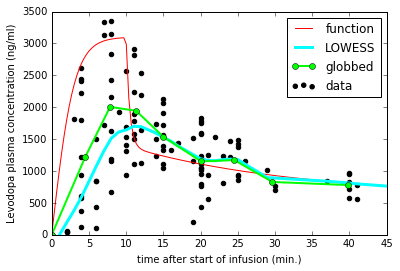

In [46]:
# First plot the real observed data.
plt.scatter(times,concs,color='black')
plt.axis((0,45,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# Now plot the current model in red.
plt.plot(testxs, testys,color='red',marker=None)
# plot the LOWESS curve
plt.plot(z[:,0],z[:,1],'cyan',linewidth=3)
# plot the globbed points
plottimes=(0.0,five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,thirty_time,forty_time)
plotconcs=(0.0,fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties)
plt.plot(plottimes,plotconcs,'lime',marker='o',linewidth=2.0) 

plt.legend(['function','LOWESS','globbed','data'], loc='upper right')  # no idea why this order

print('time:  {:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f}'.format(\
    five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,
    thirty_time,forty_time, eighty_time))
print('[LD]:  {:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f}'.format(\
    fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties, eighties))
print('S.D.:  {:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f},{:7.1f}'.format(\
    five_SD,eight_SD,eleven_SD,fifteen_SD,twenty_SD,twen5_SD,thirty_SD,forty_SD,eighty_SD))
plt.show()

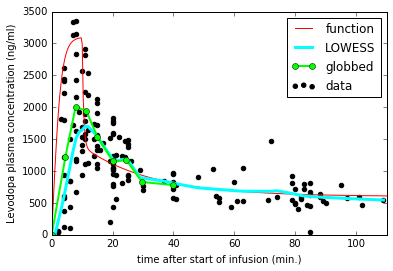

In [42]:
plt.scatter(times,concs,color='black')
plt.axis((0,110,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# Now plot the current model in red.
plt.plot(testxs, testys,color='red',marker=None)
# plot the LOWESS curve
plt.plot(z[:,0],z[:,1],'cyan',linewidth=3)
# plot the globbed points
plottimes=(0.0,five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,thirty_time,forty_time)
plotconcs=(0.0,fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties)
plt.plot(plottimes,plotconcs,'lime',marker='o',linewidth=2.0) 

plt.legend(['function','LOWESS','globbed','data'], loc='upper right')  # no idea why this order

plt.show()

**Fact check.** I went back to Cp_estimation_20150304.xlsx to see whether the above misses the peak because of different people having peaks at different times. I only looked at people with early (t<~13min) blood samples. Results:

attribute|value|units
---------|-----|-----
mean peak|2237.9|ng/ml
mean peaktime|9.0|min
N|14| --

So I think I'll replace the (7.8, 2203.1) value above by (9.0,2237.9), and accept the rest as a reasonable estimate. I'll also add 60s, 80s, and 100s.

In [12]:
sixties  = np.mean(concs[np.logical_and(times>45,times <=70)])
eighties = np.mean(concs[np.logical_and(times>70,times <=90)])
hundreds = np.mean(concs[times>90])
sixty_time   = np.mean(times[np.logical_and(times>45,times <=70)])
eighty_time  = np.mean(times[np.logical_and(times>70,times <=90)])
hundred_time = np.mean(times[times>90])
plottimes=(0.0,five_time,9.0,eleven_time,fifteen_time,twenty_time,twen5_time,\
    thirty_time,forty_time,sixty_time,eighty_time,hundred_time)
plotconcs=(0.0,fives,2237.9,elevens,fifteens,twenties,twen5s,\
    thirties,forties,sixties,eighties,hundreds)
print('   time\t   conc')
print('  =====\t ======')
for i in range(0,len(plottimes)):
    print('{0:7.1f}\t{1:7.1f}'.format(plottimes[i],plotconcs[i]))

NameError: name 'five_time' is not defined

In [ ]:
# First plot the real observed data.
plt.scatter(times,concs,color='black')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# Now plot the current model in red.
plt.plot(testxs, testys,color='red',marker=None)
# plot the globbed points
plt.plot(plottimes,plotconcs,'deepskyblue',marker='o',linewidth=2.5) 
# See http://www.w3schools.com/html/html_colornames.asp for legal HTML color names
plt.legend(['function','globbed','data'], loc='upper right')  # no idea why this order
plt.show()

**OK.** The blue fits better. There are only 3 points this way. The slopes are 273 and 225, not close enough for my taste. The best-fit quadratic is approximately `Cload(t)=296.54*t-5.321*t*t`.

The remainder (t>=10min) looks biexponential:
<img src=globbed_plot.png>

That's from Cp_estimation_20150305.xlsx.

**Wait.** That has the peak at t=9min whereas it's certainly at (or just past) 10min.

Extrapolating Cload(10min) from the quadratic above gives 2433.3. New plot isn't perhaps quite as pretty but may be more realistic. Not sure whether Cp(10min)=2433.3 or 2237.9 makes more sense.

<img src=globbed_plot2.png>

The best fit from just playing around is `Cp(t)=1400exp{-0.135(t-10)}+850exp{-0.004(t-10)}` (shown above as the light blue line). 

In [ ]:
from scipy.optimize import curve_fit
import math
plottimes=(0.0,five_time,9.0,eleven_time,fifteen_time,twenty_time,twen5_time,\
    thirty_time,forty_time,sixty_time,eighty_time,hundred_time)
plotconcs=(0.0,fives,2237.9,elevens,fifteens,twenties,twen5s,\
    thirties,forties,sixties,eighties,hundreds)
plottimes=np.asarray(plottimes[3:])
plotconcs=np.asarray(plotconcs[3:])
print(plottimes)
def fitme(plottimes, A, B, alpha, beta):
    loadtime=10.0
    target=600.0
    loadtimes = np.array(loadtime)  # np.full(plottimes.shape,loadtime)
    targets   = np.array(target)  #np.full(plottimes.shape,target)
    Amod      = np.array(A-target*A/(A+B))
    Bmod      = np.array(B-target*B/(A+B))
    alphas    = np.array(alpha)
    betas     = np.array(beta)
    return np.where(plottimes<loadtimes, plottimes*296.54-plottimes*plottimes*5.321,\
        targets+Amod*np.exp(-alphas*(plottimes-loadtimes))+Bmod*np.exp(-betas*(plottimes-loadtimes))    )
testresults=fitme(plottimes,1750,500,0.135,0.04)

print(testresults)

In [ ]:
print(len(filetimes),len(fileconcs),len([1400,850,0.135,0.004]))
popt, pcov = curve_fit(fitme, filetimes, fileconcs, p0=[1600,800,0.24,0.04])
print(popt)

**OK. I don't get it.**
My starting values (1600,800,.24,.04) fit much better than the returned parameters, whether by eye or by rms error (398 vs 810). That's t1/2alpha=2.9min, t1/2=17.3min.

I dunno, maybe ya can't have everything. 

My previous starting values, (1750,500,0.135,0.04), were better yet: rms error = 381, and they preserve peak=2250.  That's t1/2alpha=5.1min, t1/2=17.3min.

Or (2100, 250, .12, .02), rms error = 427, peak=2350.  That's t1/2alpha=5.8min, t1/2=34.7min.

**Anyway, we can reasonably describe Cp(t) as** a quadratic during the loading dose (it's nearly a straight line, if that helps), with peak about 2240-2433 at 10min, followed by biexponential decay with somewhat shorter apparent distribution and elimination half-lives than expected from previous studies.

In [ ]:
print(len(filetimes),len(fileconcs),len([1400,850,0.135,0.004]))
popt, pcov = curve_fit(fitme, filetimes, fileconcs, p0=[2133.3,300.0,0.12,0.02])
print(popt)

#Summary:

Define $t_{load}=10$min, and $C_{target}=600$ng/ml.

For $t\le t_{load}$, we have
$$C_p(t)=a_2t^2+a_1t$$, so
$$C_p'(t)=2a_2t+a_1$$ 

For $t\gt t_{load}$:

$$C_p'(t)=C_{target}+A\exp(-\alpha(t-t_{load})+B\exp(-\beta(t-t_{load}))$$

with the constraint that $C_{target}+A+B=C_p(t_{load})$, _i.e._ if $B$ is known, we know $A$.

(Defining $u=t-t_{load}$ may simplify equations for $t>t_{load}$.)

For all values of $t$,
$$C_e'(t)=k_{e0}(C_p-C_e)$$

Then $E_{max}$ is computed from $C_e$ as follows:
$$E(t)=E_0+\frac{E_{max} C_e^n(t)}{EC_{50}^n(t)+C_e^n(t)}$$

#Continued in the notebook hysteresis_4.